# SVM Analysis

As in the Logistic Regression Analysis notebook, we perform our imports here, then read in our data, and set our relative convergence metric.

In [1]:
# External libraries:
import numpy as np
from sklearn.model_selection import train_test_split

# Internal libraries:
import datasets.data as data
from descent_algorithms import *
from learning_rates import *
from models import *
from util import *

features, labels = data.load_wisconsin_breast_cancer()
wbc_X_train, wbc_X_test, wbc_y_train, wbc_y_test = train_test_split(
    features, labels, test_size=0.2)
wbc_n = wbc_X_train.shape[0]
wbc_y_train = zero_one_labels_to_signed(wbc_y_train)
wbc_y_test = zero_one_labels_to_signed(wbc_y_test)

M_features, M_labels = data.load_MNIST_13()
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(
    M_features, M_labels, test_size = 0.2)
mnist_n = mnist_X_train.shape[0]
mnist_y_train = zero_one_labels_to_signed(mnist_y_train)
mnist_y_test = zero_one_labels_to_signed(mnist_y_test)

cod_features, cod_labels = data.load_cod_rna()
cod_X_train, cod_X_test, cod_y_train, cod_y_test = train_test_split(
    cod_features, cod_labels, test_size = 0.2)
cod_n = cod_X_train.shape[0]
cod_y_train = zero_one_labels_to_signed(cod_y_train)
cod_y_test = zero_one_labels_to_signed(cod_y_test)

# relative convergence limit
rel_conv = 0.000001

c = 0.00001

Using TensorFlow backend.


Fitting gradient descent:
Iter:        0 train loss: 572.112
Iter:     2000 train loss: 0.504
Iter:     4000 train loss: 0.677
Iter:     6000 train loss: 0.648
Converged in 6604 iterations.
Runtime:11.07974 secs.

Fitting stochastic gradient descent, batch size = 100:
Iter:        0 train loss: 571.095
Iter:     2000 train loss: 16.914
Converged in 3455 iterations.
Runtime:1.21530 secs.

Fitting accelerated gradient descent:
Iter:        0 train loss: 1.000
Iter:     2000 train loss: 2.939
Iter:     4000 train loss: 2.709
Iter:     6000 train loss: 3.022
Iter:     8000 train loss: 1.842
Iter:    10000 train loss: 1.417
Iter:    12000 train loss: 1.852
Iter:    14000 train loss: 2.155
Iter:    16000 train loss: 2.549
Iter:    18000 train loss: 1.742
Runtime:35.05369 secs.

Fitting stochastic variance reduced gradient descent:
Iter:        0 train loss: 649.128
Iter:      300 train loss: 4.981
Iter:      600 train loss: 0.559
Iter:      900 train loss: 0.939
Iter:     1200 train loss: 0.

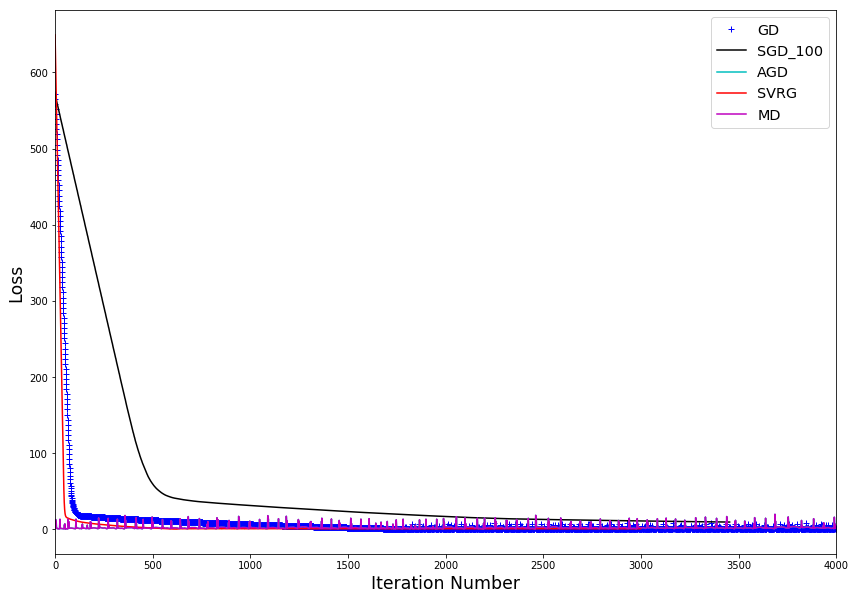

In [2]:
# initialize our learning rate object
lr = FixedRate(0.001)

# initialize our descent methods
gd = GradientDescent()
sgd_100 = GradientDescent()
agd = NesterovAcceleratedDescent()
svrg = StochasticVarianceReducedGradientDescent()
md = MirrorDescent()
# initialize all of the SVM models
gd_svm = SVM(gd, lr, c, 20000, wbc_n, rel_conv)
sgd_100_svm = SVM(sgd_100, lr, c, 20000, 100, rel_conv)
agd_svm = SVM(agd, lr, c, 20000, wbc_n, rel_conv)
svrg_svm = SVM(svrg, lr, c, 3000, wbc_n, rel_conv)
md_svm = SVM(md, lr, c, 2000, wbc_n, rel_conv)

# run fitting for all of the models
print('Fitting gradient descent:')
wbc_gd_loss = gd_svm.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 100:')
wbc_sgd_100_loss = sgd_100_svm.fit(wbc_X_train, wbc_y_train)
print('\nFitting accelerated gradient descent:')
wbc_agd_loss = agd_svm.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic variance reduced gradient descent:')
wbc_svrg_loss = svrg_svm.fit(wbc_X_train, wbc_y_train)
print('\nFitting mirror descent:')
wbc_md_loss = md_svm.fit(wbc_X_train, wbc_y_train)

# print test accuracies
acc = check_accuracy_svm(gd_svm, wbc_X_test, wbc_y_test)
print("GD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(sgd_100_svm, wbc_X_test, wbc_y_test)
print("SGD 100 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(agd_svm, wbc_X_test, wbc_y_test)
print("AGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(svrg_svm, wbc_X_test, wbc_y_test)
print("SVRG Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(md_svm, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))

plot_fixed_svm_losses(wbc_gd_loss, wbc_sgd_100_loss, wbc_agd_loss, wbc_svrg_loss, wbc_agd_loss)

Fitting gradient descent:
Iter:        0 train loss: 423.945
Iter:      100 train loss: 2.301
Iter:      200 train loss: 0.724
Iter:      300 train loss: 0.435
Iter:      400 train loss: 0.425
Converged in 485 iterations.
Runtime:0.79140 secs.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 693.814
Iter:      200 train loss: 7.467
Iter:      400 train loss: 4.771
Iter:      600 train loss: 3.977
Iter:      800 train loss: 3.752
Iter:     1000 train loss: 3.704
Converged in 1199 iterations.
Runtime:0.37965 secs.

Fitting mirror descent:
Iter:        0 train loss: 25.879
Iter:      100 train loss: 3.294
Iter:      200 train loss: 0.677
Iter:      300 train loss: 0.449
Iter:      400 train loss: 0.623
Iter:      500 train loss: 0.796
Iter:      600 train loss: 0.832
Iter:      700 train loss: 0.835
Converged in 724 iterations.
Runtime:2.28267 secs.


GD Accuracy: 85.00%
SGD 100 Accuracy: 83.57%
MD Accuracy: 85.00%


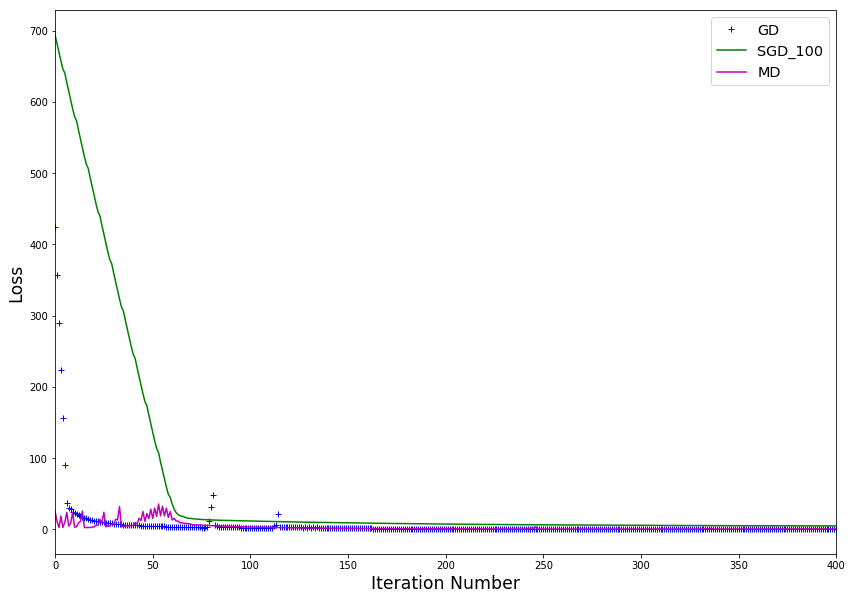

In [3]:
# initialize our learning rate object
lr_gd = PolyDecayRate(0.01, 0.0001)
lr_sgd = PolyDecayRate(0.01, 0.00001)
lr_md = PolyDecayRate(0.001, 0.00001)
# initialize our descent methods
gd = GradientDescent()
sgd_100 = GradientDescent()
md = MirrorDescent()
# initialize logistic regression models
gd_log = SVM(gd, lr_gd, c, 1000, wbc_n, rel_conv)
sgd_100_log = SVM(sgd_100, lr_sgd, c, 2000, 100, rel_conv)
md_log = SVM(md, lr_md, c, 1000, wbc_n, rel_conv)
# fit the models...
print('Fitting gradient descent:')
wbc_gd_loss = gd_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
wbc_sgd_100_loss = sgd_100_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting mirror descent:')
wbc_md_loss = md_log.fit(wbc_X_train, wbc_y_train)
# print the test accuracies for each model
acc = check_accuracy_svm(gd_log, wbc_X_test, wbc_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(sgd_100_log, wbc_X_test, wbc_y_test)
print("SGD 100 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(md_log, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))
# plot the loss convergences for each model
plot_dynamic_svm_losses(wbc_gd_loss, wbc_sgd_100_loss, wbc_md_loss)

Fitting gradient descent:
Iter:        0 train loss: 378.662
Iter:      200 train loss: 14.512
Iter:      400 train loss: 3.731
Iter:      600 train loss: 2.432
Iter:      800 train loss: 2.395
Iter:     1000 train loss: 1.808
Iter:     1200 train loss: 2.190
Iter:     1400 train loss: 0.938
Iter:     1600 train loss: 1.401
Iter:     1800 train loss: 0.858
Runtime:3.40478 secs.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 296.305
Iter:      600 train loss: 1.207
Iter:     1200 train loss: 1.177
Iter:     1800 train loss: 1.266
Iter:     2400 train loss: 0.834
Iter:     3000 train loss: 0.883
Iter:     3600 train loss: 0.623
Iter:     4200 train loss: 0.749
Iter:     4800 train loss: 0.710
Iter:     5400 train loss: 0.729
Runtime:1.98867 secs.

Fitting mirror descent:
Iter:        0 train loss: 25.855
Iter:      200 train loss: 3.411
Iter:      400 train loss: 0.685
Iter:      600 train loss: 3.039
Iter:      800 train loss: 1.948
Iter:     1000 train

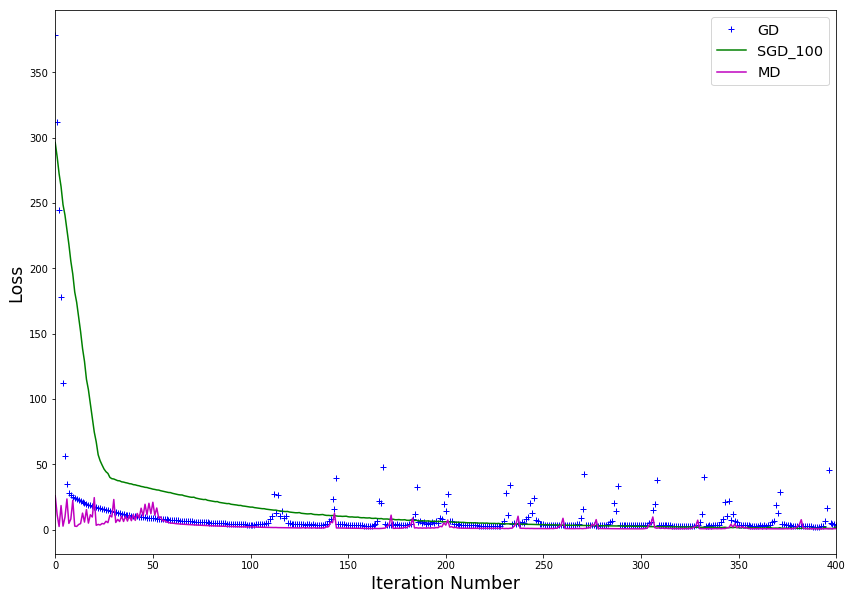

In [4]:
# initialize our learning rate object
lr_gd = ExpDecayRate(0.01, 0.001)
lr_sgd = ExpDecayRate(0.01, 0.0001)
lr_md = ExpDecayRate(0.001, 0.001)
# initialize our descent methods
gd = GradientDescent()
sgd_100 = GradientDescent()
md = MirrorDescent()
# initialize logistic regression models
gd_log = SVM(gd, lr_gd, c, 2000, wbc_n, rel_conv)
sgd_100_log = SVM(sgd_100, lr_sgd, c, 6000, 100, rel_conv)
md_log = SVM(md, lr_md, c, 2000, wbc_n, rel_conv)
# fit the models...
print('Fitting gradient descent:')
wbc_gd_loss = gd_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
wbc_sgd_100_loss = sgd_100_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting mirror descent:')
wbc_md_loss = md_log.fit(wbc_X_train, wbc_y_train)
# print the test accuracies for each model
acc = check_accuracy_svm(gd_log, wbc_X_test, wbc_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(sgd_100_log, wbc_X_test, wbc_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(md_log, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))
# plot the loss convergences for each model
plot_dynamic_svm_losses(wbc_gd_loss, wbc_sgd_100_loss, wbc_md_loss)